
DATASET PREVIEW:
╒════╤══════════════╤═══════════╤════════╤═══════════════╤═════════╕
│    │   horsepower │   mileage │   year │   brand_value │   price │
╞════╪══════════════╪═══════════╪════════╪═══════════════╪═════════╡
│  0 │          100 │     15000 │   2015 │             7 │    5000 │
├────┼──────────────┼───────────┼────────┼───────────────┼─────────┤
│  1 │          150 │     12000 │   2017 │             8 │    8000 │
├────┼──────────────┼───────────┼────────┼───────────────┼─────────┤
│  2 │          200 │     18000 │   2018 │             9 │   12000 │
├────┼──────────────┼───────────┼────────┼───────────────┼─────────┤
│  3 │          250 │     20000 │   2019 │             7 │   15000 │
├────┼──────────────┼───────────┼────────┼───────────────┼─────────┤
│  4 │          300 │     25000 │   2020 │            10 │   20000 │
├────┼──────────────┼───────────┼────────┼───────────────┼─────────┤
│  5 │          120 │     14000 │   2016 │             6 │    6000 │
├────┼──────────

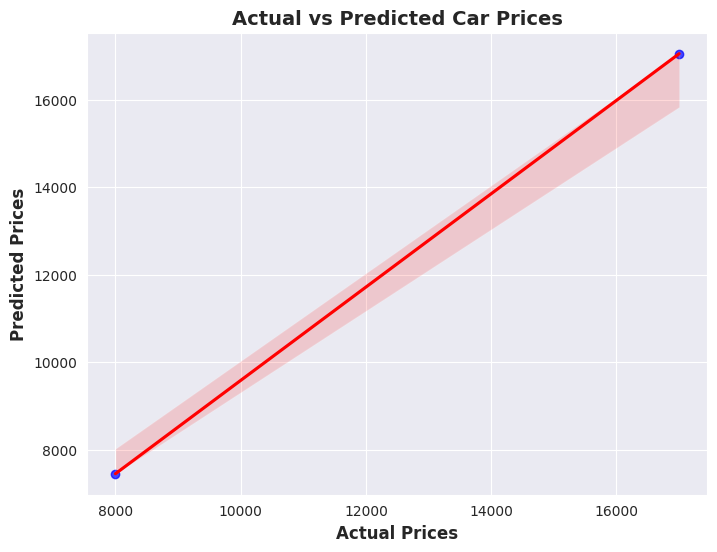

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate  # For better text formatting

# Set Seaborn style for attractive visuals
sns.set_style("darkgrid")

# Create a sample dataset
data = {
    "horsepower": [100, 150, 200, 250, 300, 120, 180, 220, 270, 320],
    "mileage": [15000, 12000, 18000, 20000, 25000, 14000, 16000, 19000, 23000, 28000],
    "year": [2015, 2017, 2018, 2019, 2020, 2016, 2017, 2018, 2019, 2021],
    "brand_value": [7, 8, 9, 7, 10, 6, 8, 9, 7, 10],
    "price": [5000, 8000, 12000, 15000, 20000, 6000, 10000, 14000, 17000, 22000]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Display dataset in a formatted table
print("\nDATASET PREVIEW:")
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

# Select features and target variable
features = ['horsepower', 'mileage', 'year', 'brand_value']
target = 'price'

X = df[features]
y = df[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics in a tabulated format
eval_data = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R-Squared Score (R²)"],
    "Value": [mae, mse, rmse, r2]
}
eval_df = pd.DataFrame(eval_data)

print("\nMODEL EVALUATION METRICS:")
print(tabulate(eval_df, headers='keys', tablefmt='fancy_grid'))

# Enhanced Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue", "alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("Actual Prices", fontsize=12, fontweight='bold')
plt.ylabel("Predicted Prices", fontsize=12, fontweight='bold')
plt.title("Actual vs Predicted Car Prices", fontsize=14, fontweight='bold')
plt.show()
